<img src="../images/Peoplelogy-Logo.png" style="height: 150px;" align=left> <img src="../images/python-logo.png" style="height: 150px;" align=right>

# Customer Segmentation Analysis Project

<img src="../images/mall.jpg" style="height: 500px; width: 1500px;" align=left>
<br>

---
### Objective
Analyze customer demographics and spending behavior using descriptive statistics, visualizations, and distribution analysis. The goal is to provide insights into customer segments and spending patterns, incorporating knowledge of central tendency, dispersion, and outlier analysis.

---

## Project Instructions
### Deliverables
- **Summary Report**: Summarize key findings for each question.
- **Visualizations**: Include all histograms, box plots, scatter plots, and bar charts created during the analysis.
- **Interpretations**: Provide written explanations for all analyses, including insights from central tendency, dispersion, and distribution analysis.


In [2]:
import numpy as np 
import pandas as pd 
import math 
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Now if there are warnings, they will not be shown
warnings.warn("This warning will not show up")



from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

---
### 1. Basic Data Exploration

#### Q1: Load and explore the dataset.
- Display the first five rows of the dataset.
- Identify and list all columns along with their data types.

In [8]:
df = pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE CLASS\Class\Technical class\Self learn\project\Customer Segmentation Analysis (Descriptive Analysis & Spending Patterns)\data\Raw data\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Change the datatype (Customer ID and Gender into object/string)

In [9]:
#Using pandas
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
#Using pandas
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

#### Q2: Check for any missing values in the dataset. If there are any, note which columns are affected.



In [11]:
#Your Code Here
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
#Your Code Here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Change the datatype (Customer ID and Gender into object/string)

In [13]:
# Convert CustomerID column to object (string)
df['CustomerID'] = df['CustomerID'].astype('object')

# Verify the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


<span style="color:red">***This table clean from any missing values, need change the customer id datatype to string***</span>


---

### 2. Descriptive Statistics

#### Q3: Calculate and interpret the following statistics for the **Age**, **Annual Income**, and **Spending Score** columns:
   - Mean
   - Median
   - Mode
   - Standard deviation


In [14]:
#Your Code Here
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<span style="color:red">***Overall about Mean Median Standard deviation***</span>


In [15]:
annual_income_mode = df['Gender'].value_counts()
annual_income_mode.head(1)


Gender
Female    112
Name: count, dtype: int64

In [16]:
mode_df = df.mode()
mode_df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0


In [17]:
mode_gender = df['Gender'].mode()[0] 
mode_gender_count = df['Gender'].value_counts()[mode_gender]  
mode_gender_count

np.int64(112)

In [18]:
mode_age = df['Age'].mode()[0]
mode_Age_count = df['Age'].value_counts()[mode_age]
mode_Age_count

np.int64(11)

In [19]:
mode_income = df['Annual Income (k$)'].mode()[0]
mode_income_count = df['Annual Income (k$)'].value_counts()[mode_income]
mode_income_count 

np.int64(12)

<span style="color:red">***Mode=Female,122 / Age=32,11 / Annual income=54000/12***</span>


## Visualize

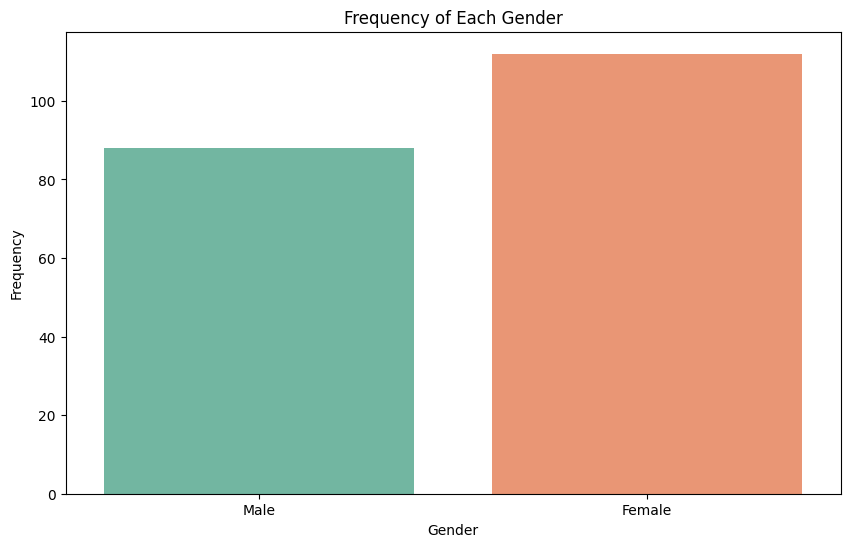

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='Set2')

plt.title("Frequency of Each Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

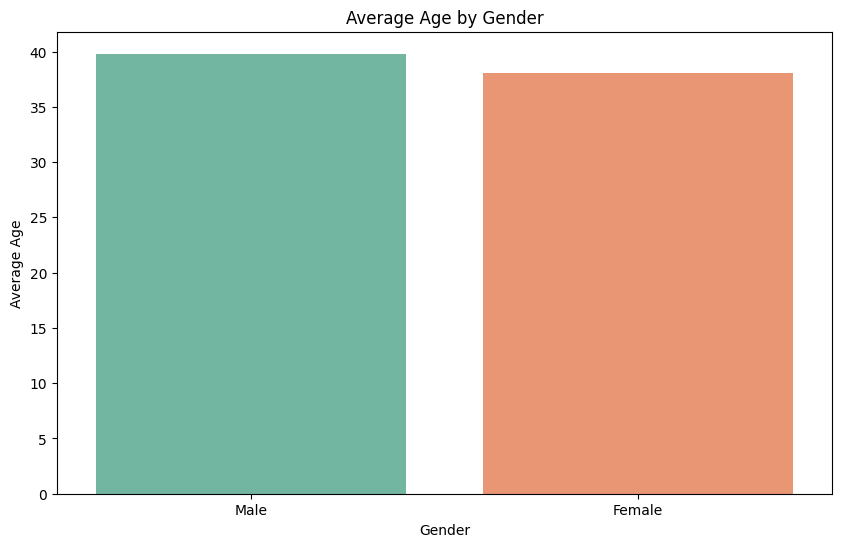

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Age', data=df, ci=None, estimator='mean', palette='Set2')

plt.title("Average Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.show()

**Spending Behavior:** Female customers have a higher spending behavior overall compared to male customers. This could suggest that females in this dataset tend to spend more, which may reflect different purchasing habits or preferences.

**Age Distribution:** The male customers in this dataset generally belong to a slightly older age group compared to female customers. This implies that age and gender may correlate differently with spending patterns, possibly influenced by varying financial priorities or life stages.

---

### 3. Distribution Analysis

#### Q4: Examine the **Age** distribution using a histogram. Describe whether it appears normally distributed, skewed, or has any outliers.


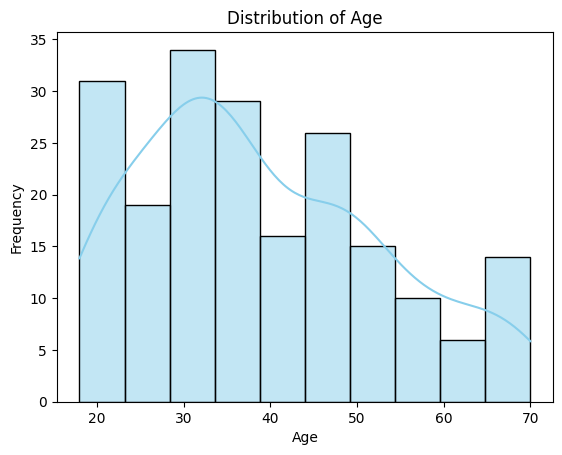

In [22]:
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Label dan tajuk
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Paparkan plot
plt.show()

<Axes: xlabel='Age'>

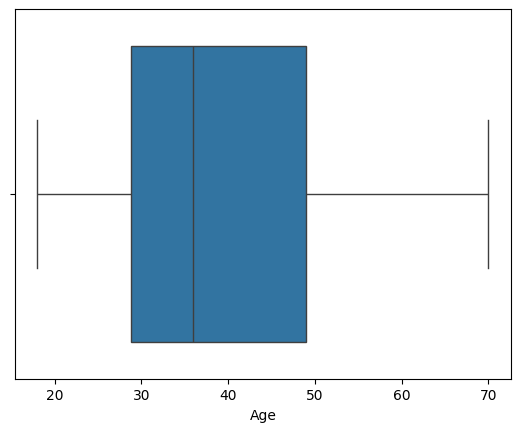

In [23]:
import seaborn as sns
sns.boxplot(x=df['Age'])


#### Q5: Calculate the **skewness** and **kurtosis** for the **Annual Income** and **Spending Score** columns. Interpret the results.

---

## Income distribution

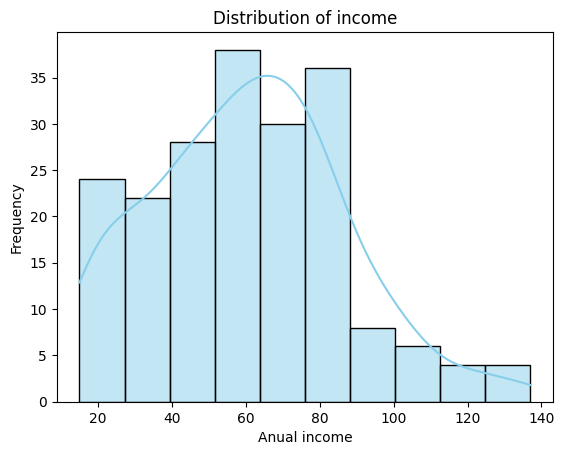

In [19]:
sns.histplot(df['Annual Income (k$)'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Label dan tajuk
plt.xlabel('Anual income')
plt.ylabel('Frequency')
plt.title('Distribution of income')

# Paparkan plot
plt.show()

In [20]:
annual_income_skewness = df['Annual Income (k$)'].skew()
annual_income_kurtosis = df['Annual Income (k$)'].kurtosis()

print(f"Annual Income Skewness: {annual_income_skewness}")
print(f"Annual Income Kurtosis: {annual_income_kurtosis}")


Annual Income Skewness: 0.3218425498619055
Annual Income Kurtosis: -0.09848708652696203


## Spending distribution

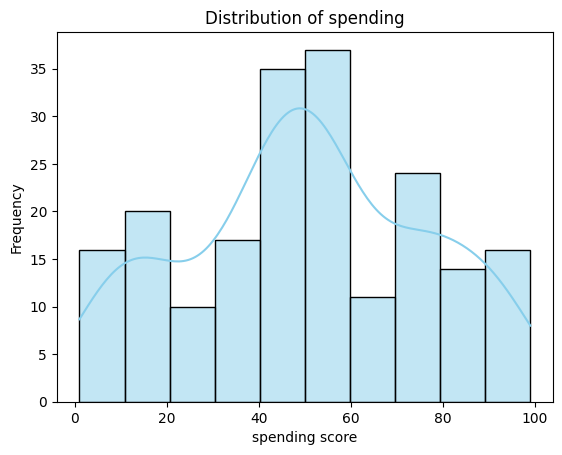

In [21]:
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Label dan tajuk
plt.xlabel('spending score')
plt.ylabel('Frequency')
plt.title('Distribution of spending')

# Paparkan plot
plt.show()

In [22]:
spending_score_skewness = df['Spending Score (1-100)'].skew()
spending_score_kurtosis = df['Spending Score (1-100)'].kurtosis()

print(f"Spending Score Skewness: {spending_score_skewness}")
print(f"Spending Score Kurtosis: {spending_score_kurtosis}")

Spending Score Skewness: -0.047220201374263374
Spending Score Kurtosis: -0.8266291062061502


<span style="color:red">***Annual Income shows a slight rightward skew, but its distribution is nearly normal with a slight spread.\
Spending Score is more symmetrical, with a slightly wider spread and no sharp peaks or extreme values.***</span>



If skewness ≈ 0 (or between -0.5 and 0.5), the data is approximately normal.\
If skewness > 0, the data is positively skewed (right skew).\
If skewness < 0, the data is negatively skewed (left skew).\
A skewness value between -1 and -0.5 or between 0.5 and 1 indicates moderate skewness.\
A skewness value less than -1 or greater than 1 indicates high skewness.



### 4. Exploring Relationships Between Variables

#### Q6: Use a **box plot** to compare the **Spending Score** distribution for **Male** and **Female** customers. What can you infer about the spending patterns?


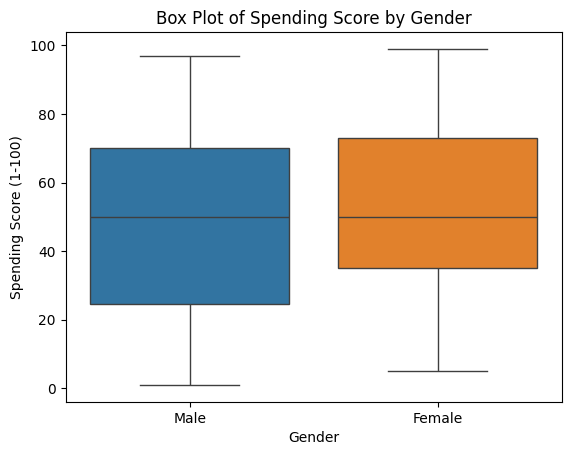

In [23]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Box Plot of Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

<span style="color:red">***SO BASED ON THIS BOXPLOT, IT SHOWN NO OUTLIERS***</span>


#### Q7: Use a **scatter plot** to examine the relationship between **Annual Income** and **Spending Score**. Calculate the Pearson correlation coefficient and interpret the relationship.


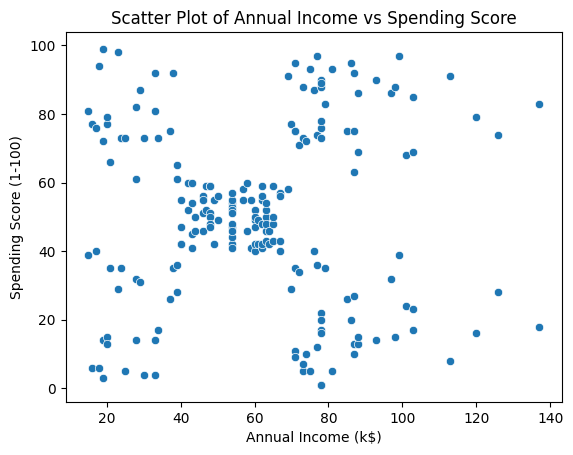

In [24]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Scatter Plot of Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

<span style="color:red">***= SO BASED ON THIS PLOT, IT SHOWN NO RELATIONSHIP BETWEEN ANNUAL INCOME AND SPENDING SCORE***</span>

In [25]:
# Pilih lajur yang hanya bersifat numerik
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Kira korelasi Spearman untuk data numerik sahaja
spearman_corr = numeric_data.corr(method='spearman')

spearman_corr


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.019767,-0.34494
Annual Income (k$),0.019767,1.000000,0.00784
Spending Score (1-100),-0.344940,0.007840,1.00000


<span style="color:red">***= Using the Spearman correlation analysis only for numeric data***</span>

Age and Annual Income: There is no significant relationship between age and annual income. Age does not affect how much people earn.

Age and Spending Score: There is a weak negative relationship between age and spending score. As people get older, their spending score tends to decrease, but this relationship is weak.

Annual Income and Spending Score: There is almost no relationship between annual income and spending score. A person's income does not significantly affect how much they spend.

---


### 5. Outlier Detection

#### Q8: Calculate the following for the **Age** and **Annual Income** columns:
   - Q1 (25th percentile)
   - Q3 (75th percentile)
   - Interquartile Range (IQR)
   - Lower Fence (LF)
   - Upper Fence (UF)

   Identify any outliers based on these values.


## Age

In [26]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age-Q1_age 

LF_age = Q1_age - 1.5 * IQR_age
UF_age = Q3_age + 1.5 * IQR_age

outliers_age = df[(df['Age'] < LF_age) | (df['Age'] > UF_age)]

outliers_age 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [27]:
LF_age = Q1_age - 1.5 * IQR_age
UF_age = Q3_age + 1.5 * IQR_age

In [28]:
LF_age 

np.float64(-1.625)

In [29]:
UF_age 

np.float64(79.375)

In [30]:
Q1_income = df['Annual Income (k$)'].quantile(0.25)
Q3_income = df['Annual Income (k$)'].quantile(0.75)
IQR_income = Q3_income-Q1_income 

LF_income = Q1_income- 1.5 * IQR_income
UF_income = Q3_income + 1.5 * IQR_income

LF_income,UF_income


(np.float64(-13.25), np.float64(132.75))

## Annual Income

In [24]:
Q1_income = df['Annual Income (k$)'].quantile(0.25)
Q3_income = df['Annual Income (k$)'].quantile(0.75)
IQR_income = Q3_income-Q1_income 

LF_income = Q1_income- 1.5 * IQR_income
UF_income = Q3_income + 1.5 * IQR_income

In [25]:
LF_income, UF_income 

(np.float64(-13.25), np.float64(132.75))

## Filter the data refer the LF and UF

In [33]:
outliers_income = df[df['Annual Income (k$)'] > 1732.5]
outliers_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [34]:
filter = df['Annual Income (k$)'].unique()
filter

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

<Axes: xlabel='Annual Income (k$)'>

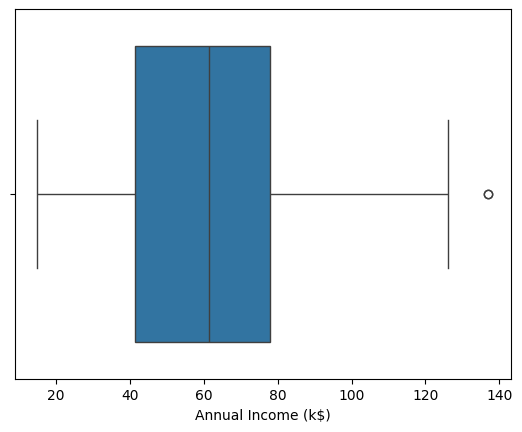

In [35]:
sns.boxplot(x='Annual Income (k$)', data=df)

<span style="color:red">***= SO BASED ON  Outlier detection, detect anual income have outliers***</span>

---

### 6. Customer Segmentation Analysis

#### Q9: Group customers by **Age Group** (e.g., <20, 20-30, 30-40, etc.) and calculate the mean **Spending Score** for each group. Visualize the results in a bar chart.

   - **Hint**: Use `pd.cut()` to create age groups, and then `groupby()` to calculate average values.

In [26]:
bins = [0, 20, 30, 40, 50, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50+']

#Create a new file
new_df = df.copy()

#Use a cut method in pandas
new_df['Age Group'] = pd.cut(new_df['Age'], bins=bins, labels=labels, right=False)

#display
new_df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,<20
1,2,Male,21,15,81,20-30
2,3,Female,20,16,6,20-30
3,4,Female,23,16,77,20-30
4,5,Female,31,17,40,30-40
...,...,...,...,...,...,...
195,196,Female,35,120,79,30-40
196,197,Female,45,126,28,40-50
197,198,Male,32,126,74,30-40
198,199,Male,32,137,18,30-40


In [37]:

# Group by 'Age Group' and calculate the mean of 'Spending Score (1-100)'
age_group_avg = new_df.groupby('Age Group')['Spending Score (1-100)'].mean()

# Convert the Series to a DataFrame
age_group_mean = pd.DataFrame({'Spending Score': age_group_avg})

# Display the result
age_group_mean

,Spending Score
Age Group,
<20,46.500000
20-30,61.953488
30-40,61.098361
40-50,34.948718
50+,38.400000


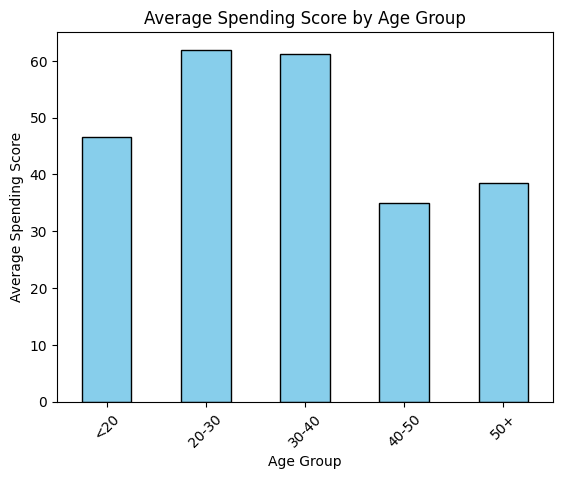

In [38]:
# Bar plot untuk purata Spending Score mengikut Age Group
age_group_avg.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Age Group')
plt.xticks(rotation=45)
plt.show()


<span style="color:red">***=This segment by age for mean each***</span>

---


### 10. Examine Gender-Based Spending Habits
   - **Question**: Calculate the average **Spending Score** and **Annual Income** for each gender. Does one gender tend to spend more on average?
   - **Hint**: Use `groupby()` on the gender column 


In [39]:
spending_score_gender = new_df.groupby('Gender')['Spending Score (1-100)'].mean()

spending_score_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [40]:
Anual_income_gender = new_df.groupby('Gender')['Annual Income (k$)'].mean()
Anual_income_gender

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


### 11. Calculate Z-scores for Spending Score
   - **Question**: Calculate the Z-scores for the **Spending Score** column to identify which customers have exceptionally high or low spending scores. Highlight any customers with Z-scores greater than 2 or less than -2.
   - **Hint**: Z-score can be calculated as `(value - mean) / std`.

In [41]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


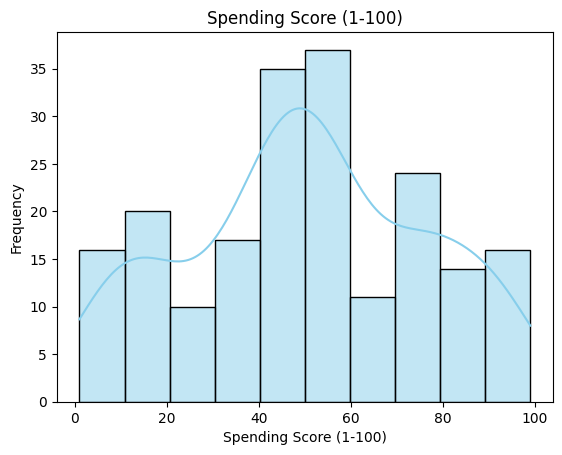

In [42]:
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=10, color='skyblue', edgecolor='black')


plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Spending Score (1-100)')

# Paparkan plot
plt.show()


In [27]:
import pandas as pd
import numpy as np

# Mengira purata dan sisihan piawai untuk Spending Score
mean_spending = df['Spending Score (1-100)'].mean()
std_spending = df['Spending Score (1-100)'].std()

# Mengira Z-skor
df['Z-score'] = (df['Spending Score (1-100)'] - mean_spending) / std_spending

# Mengenal pasti pelanggan yang mempunyai Z-skor > 2 atau < -2
outliers = df[(df['Z-score'] > 2) | (df['Z-score'] < -2)]
outliers 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Z-score


In [44]:
#Your Code Here


### 12. Cluster Analysis Preparation (Optional)
   - **Question**: Use the Age and Annual Income columns to create basic clusters (e.g., Low Income/Young Age, High Income/Older Age). Categorize each customer based on these clusters.
   - **Hint**: You can use `pd.cut()` for age ranges and income ranges, and then combine them to create clusters.


Young Age: Ages 18 to 44\
Older Age: Ages 45 to 70

Low Income: 15 to 76\
High Income: 77 to 137

**"I’m using a def function and conditional statements to create segments, without combining them using pd.cut."**

In [45]:
# Sample data
age = new_df['Age']
income = new_df['Annual Income (k$)']

# Function to categorize age
def age_cluster(age):
    if age >= 18 and age <= 44:
        return 'Young age'
    else:
        return 'Older age'

# Function to categorize income
def income_cluster(income):
    if income >= 15 and income <= 76:
        return 'Low income'
    else:
        return 'High income'

# Applying the functions to the DataFrame
new_df['Age Cluster'] = new_df['Age'].apply(age_cluster)
new_df['Income Cluster'] = new_df['Annual Income (k$)'].apply(income_cluster)

# Displaying the categorized DataFrame
new_df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Age Cluster,Income Cluster
0,1,Male,19,15,39,<20,Young age,Low income
1,2,Male,21,15,81,20-30,Young age,Low income
2,3,Female,20,16,6,20-30,Young age,Low income
3,4,Female,23,16,77,20-30,Young age,Low income
4,5,Female,31,17,40,30-40,Young age,Low income
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,30-40,Young age,High income
196,197,Female,45,126,28,40-50,Older age,High income
197,198,Male,32,126,74,30-40,Young age,High income
198,199,Male,32,137,18,30-40,Young age,High income



### 13. Calculate and Interpret Percentiles
   - **Question**: Calculate the 25th, 50th, and 75th percentiles for the **Spending Score** and **Annual Income** columns. What insights can you gain from these percentiles?
   - **Hint**: Use `np.percentile()` or `df.quantile()` to get these values for each column.


## Spending Score

In [46]:
#Other methods to show the percentile
new_df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [47]:
# Calculating the 25th and 75th percentiles of the 'Spending Score (1-100)' column
Q1_spending = np.percentile(new_df['Spending Score (1-100)'], 25)
Q3_spending = np.percentile(new_df['Spending Score (1-100)'], 75)

print(f'Percentile for spending score Q1 is {Q1_spending} while Q3 is {Q3_spending}, while the Q2 is median of the data which is 50')


Percentile for spending score Q1 is 34.75 while Q3 is 73.0, while the Q2 is median of the data which is 50


## Annual Income

In [48]:
#Other methods to show the percentile
new_df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [49]:
Q1_income = np.percentile(new_df['Annual Income (k$)'],0.25)
Q3_income = np.percentile(new_df['Annual Income (k$)'],0.75)


print(f'Percentile for income score Q1 is {Q1_income} while Q3 is {Q3_income}, while the Q2 is median of the data which is 61.50')




Percentile for income score Q1 is 15.0 while Q3 is 15.4925, while the Q2 is median of the data which is 61.50


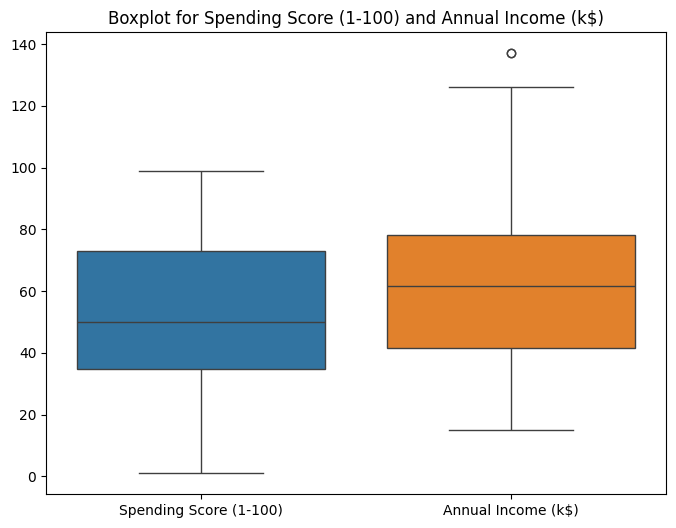

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combined boxplot for Spending Score and Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df[['Spending Score (1-100)', 'Annual Income (k$)']])

# Title for the plot
plt.title('Boxplot for Spending Score (1-100) and Annual Income (k$)')

# Display the plot
plt.show()


In [51]:
#Your Code Here


### 14. Visualize Spending Score Distribution by Gender and Age Group
   - **Question**: Create a box plot to show **Spending Score** distribution across both gender and age groups. Which group has the highest variability in spending?
   - **Hint**: Use `sns.boxplot()` with `x='Age Group'`, `y='Spending Score'`, and `hue='Gender'` if using Seaborn.

im make the cluster for spending score

Low Spending: 1 - 49\
High Spending: 50 - 99

In [52]:

# Sample data
spending = new_df['Spending Score (1-100)']

# Function to categorize spending
def spending_cluster(spending):
    if spending >= 1 and spending <= 49:
        return 'Low spending'
    else:
        return 'High spending'

# Applying the function to the 'Spending Score (1-100)' column
new_df['Spending Cluster'] = new_df['Spending Score (1-100)'].apply(spending_cluster)

# Displaying the categorized DataFrame
new_df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Age Cluster,Income Cluster,Spending Cluster
0,1,Male,19,15,39,<20,Young age,Low income,Low spending
1,2,Male,21,15,81,20-30,Young age,Low income,High spending
2,3,Female,20,16,6,20-30,Young age,Low income,Low spending
3,4,Female,23,16,77,20-30,Young age,Low income,High spending
4,5,Female,31,17,40,30-40,Young age,Low income,Low spending
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,30-40,Young age,High income,High spending
196,197,Female,45,126,28,40-50,Older age,High income,Low spending
197,198,Male,32,126,74,30-40,Young age,High income,High spending
198,199,Male,32,137,18,30-40,Young age,High income,Low spending


## Question: Create a box plot to show Spending Score distribution across both gender and age groups. Which group has the highest variability in spending?

In [53]:
spending_demographic = new_df.groupby('Spending Cluster')['Gender'].value_counts()
spending_demographic

Spending Cluster  Gender
High spending     Female    58
                  Male      44
Low spending      Female    54
                  Male      44
Name: count, dtype: int64

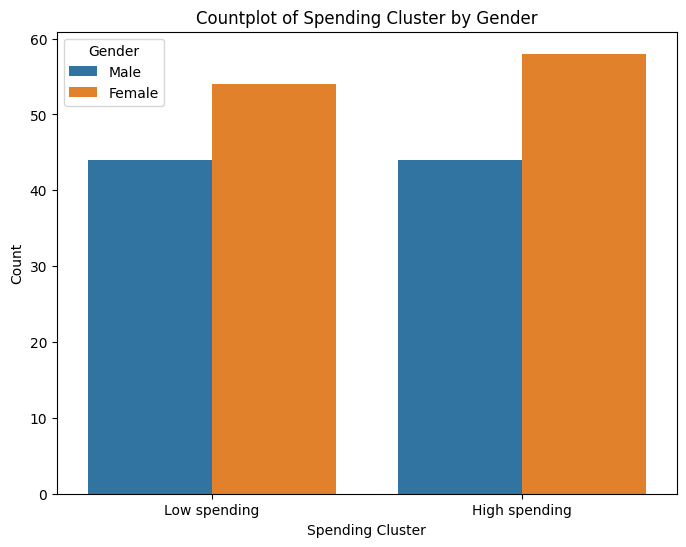

In [54]:
# Create a countplot for Spending Cluster grouped by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=new_df, x='Spending Cluster', hue='Gender')

# Add title and labels
plt.title('Countplot of Spending Cluster by Gender')  # Update title
plt.xlabel('Spending Cluster')  # Update x-label
plt.ylabel('Count')

# Show the plot
plt.show()


<span style="color:red">***= SO BASED ON this, Female is tend to spend higher than man***</span>

## while using the boxplot

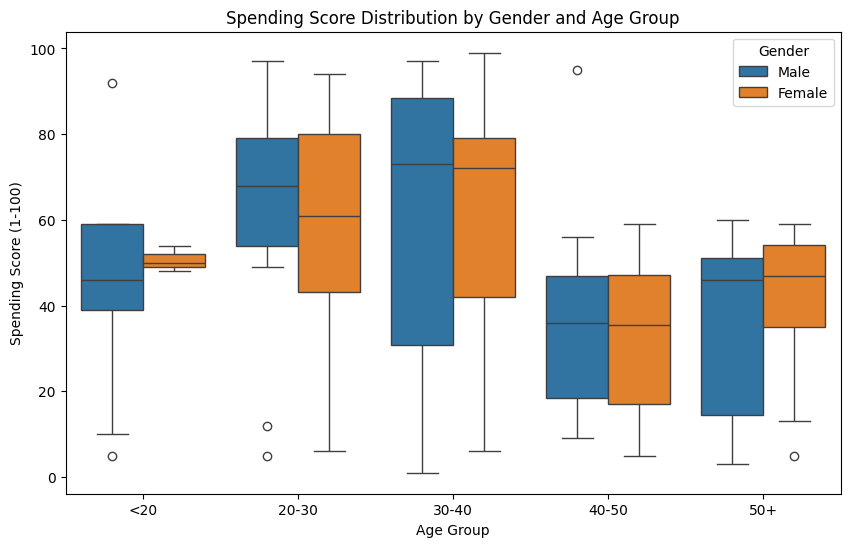

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for Spending Score distribution across Gender and Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='Age Group', y='Spending Score (1-100)', hue='Gender')

# Add title and labels
plt.title('Spending Score Distribution by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()
